In [25]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import time
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Activation
from sklearn.linear_model import LogisticRegression
%matplotlib inline

In [4]:
# CNN for MIT-BIH Arrhythmia Dataset

train_data = pd.read_csv("mitbih_train.csv", header = None) 
train_data=pd.DataFrame(train_data)
test_data = pd.read_csv("mitbih_test.csv", header = None)
test_data=pd.DataFrame(test_data)

In [5]:
# Print some data for train dataset

train_data.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# Print some data for test dataset

test_data.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
# Describe the data frame

train_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
count,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,...,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000
mean,0.890360,0.758160,0.423972,0.219104,0.201127,0.210399,0.205808,0.201773,0.198691,0.196757,...,0.005025,0.004628,0.004291,0.003945,0.003681,0.003471,0.003221,0.002945,0.002807,0.473376
std,0.240909,0.221813,0.227305,0.206878,0.177058,0.171909,0.178481,0.177240,0.171778,0.168357,...,0.044154,0.042089,0.040525,0.038651,0.037193,0.036255,0.034789,0.032865,0.031924,1.143184
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.921922,0.682486,0.250969,0.048458,0.082329,0.088416,0.073333,0.066116,0.065000,0.068639,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.991342,0.826013,0.429472,0.166000,0.147878,0.158798,0.145324,0.144424,0.150000,0.148734,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.910506,0.578767,0.341727,0.258993,0.287628,0.298237,0.295391,0.290832,0.283636,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


In [8]:
train_data.shape

(87554, 188)

In [9]:
from tensorflow.keras.utils import to_categorical
# define features and target
X_train = train_data.iloc[:, train_data.columns != 187]
y_train = train_data.iloc[:, train_data.columns == 187]
# y_train = to_categorical(y_train)
print(y_train)
X_test = test_data.iloc[:, test_data.columns != 187]
y_test = test_data.iloc[:, test_data.columns == 187]
# y_test = to_categorical(y_test)

       187
0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
...    ...
87549  4.0
87550  4.0
87551  4.0
87552  4.0
87553  4.0

[87554 rows x 1 columns]


In [15]:
# Experiments
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor

test_scores_models = []

# for num_components in range(2, y.shape[0], y.shape[0]//10):
#     print(f'{num_components} components\n')
    
#     # call the principal component
#     pca = PCA(n_components = num_components, random_state=42) # for reproducability
    
#     X_train = pca.fit_transform(X_train)    
#     X_test = pca.transform(X_test)
    
    
#     # KNN
#     print("------------------------KNN------------------------\n")
#     start = time.time()
#     knn = KNeighborsClassifier(n_neighbors = 3).fit(X_train, y_train)
#     print('Accuracy of KNN is', knn.score(X_test, y_test))
#     end = time.time()
#     test_scores_models.append(knn.score(X_test, y_test))
    
#     print(f'KNN took {end-start} seconds to run\n')

# DECISION TREE
print("------------------------DECISION TREE------------------------\n")
start = time.time()
dt = DecisionTreeClassifier(max_depth = 5).fit(X_train, y_train)
print('Accuracy of Decision Tree is', dt.score(X_test, y_test))
end = time.time()    
test_scores_models.append(dt.score(X_test, y_test))
print(f'Decision Tree took {end-start} seconds to run\n')

print("------------------------Logistic Regression--------------------------------\n")    
start = time.time()
lr = LogisticRegression().fit(X_train, y_train)
print('Accuracy of Logistic Regression is', lr.score(X_test, y_test))
end = time.time()    
test_scores_models.append(lr.score(X_test, y_test))

print(f'Logistic Regression took {end-start} seconds to run\n')

    
    


------------------------DECISION TREE------------------------

Accuracy of Decision Tree is 0.9325781107253791
Decision Tree took 9.773782968521118 seconds to run

------------------------Logistic Regression--------------------------------



/Users/SAM/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of Logistic Regression is 0.91174858395761
Logistic Regression took 4.838033199310303 seconds to run



/Users/SAM/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/Users/SAM/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/SAM/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/SAM/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.94      0.99      0.96     18118
         1.0       0.50      0.42      0.45       556
         2.0       0.93      0.66      0.77      1448
         3.0       0.00      0.00      0.00       162
         4.0       0.96      0.85      0.90      1608

    accuracy                           0.93     21892
   macro avg       0.67      0.58      0.62     21892
weighted avg       0.92      0.93      0.93     21892



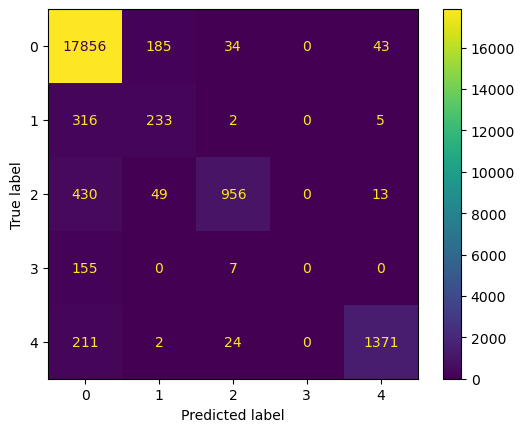

In [23]:
y_pred = dt.predict(X_test)
 
 
print(classification_report(y_test, y_pred))
 
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()

              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95     18118
         1.0       0.85      0.35      0.50       556
         2.0       0.65      0.33      0.44      1448
         3.0       0.53      0.29      0.38       162
         4.0       0.95      0.87      0.91      1608

    accuracy                           0.91     21892
   macro avg       0.78      0.57      0.63     21892
weighted avg       0.90      0.91      0.90     21892



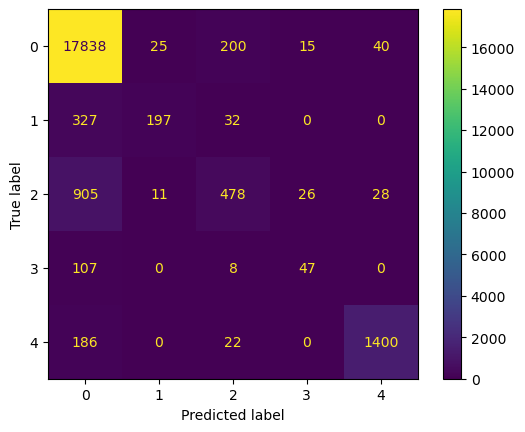

In [24]:
y_pred = lr.predict(X_test)
  
print(classification_report(y_test, y_pred))
 
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()